# __Laboratorio: Búsqueda no informada__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda no informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, node, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def is_goal(self, node):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        return self.goal == node

    def action_cost(self, s, a, s1):
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

También es posible implementar la clase abstracta `Node` para representar los

> Bloque con sangría


posibles estados del problemas.

In [ ]:
class Node:
   'A node in a search problem'
   def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

   def states_path(self):
       'The requiered sequence of states to get this node'
       if self.parent == None:
            return [self]
       return self.parent.states_path() + [self]

   def actions_path(self):
      'The required sequence of actions to get this node'
      if self.parent == None:
          return []
      return self.parent.actions_path() + [self.action]

   def __eq__(self, node):
        if node:
            return self.state == node.state
        return False

   def __repr__(self):
        return self.state

Una implementación de los algoritmos `BFS` y `DFS` tal como se vió en clase.

In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def BFS(problem, fringe = []):
    closed = []
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop(0)
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.append(child)

def DFS(problem, fringe = []):
    closed = []
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.append(child)


##Un rompecabezas para niños__

El siguiente rompecabezas es un juego para niños en el cual las piezas solo pueden unirse en línea recta cambiándolas de lugar a través de tres operaciones permitidas por el juego. El objetivo es lograr una configuración como la que se presenta a continuación:

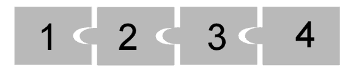

El estado inicial puede ser cualquier combinación posible de las cuatro piezas. Las operaciones permitidas son:

* __D__: intercambiar dos piezas a la derecha
* __C__: intercambiar dos piezas en el centro
* __I__: intercambiar dos piezas en la izquierda

Encuentra la solución a este rompecabezas formulandolo como un problema búsqueda. Para esto

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar las el tablero
* Encuentre la solución al problema utilizando los algoritmos BFS y DFS
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos



In [ ]:
class Node:
    'A node in a search problem'
    def __init__(self, state, parent=None, action=None, cost=1):
        self.state = state.copy()
        self.parent = parent
        self.action = action

    def states_path(self):
        'The required sequence of states to get this node'
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        'The required sequence of actions to get this node'
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]

    def __eq__(self, node):
        if isinstance(node, Node):
            return self.state == node.state.copy()
        return False

    def __repr__(self):
        return str((self.state))


class RompecabezasProblem:
    def __init__(self, initial, goal):
        self.initial = Node(initial, action=None)
        self.goal = goal

    def actions(self, node):
        return ['D', 'C', 'I']

    def result(self, node, action):
        state = node.state.copy()
        if action == 'D':
            state[2], state[3] = state[3], state[2]
        elif action == 'C':
            state[1], state[2] = state[2], state[1]
        elif action == 'I':
            state[0], state[1] = state[1], state[0]
        return Node(state)

    def is_goal(self, node):
        return node.state == self.goal

    def cost(self, node, action, next_node):
        return 1


In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def BFS(problem, fringe = []):
    closed = []
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop(0)
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.append(child)
                #print(fringe)
def DFS(problem, fringe = []):
    closed = []
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.append(child)

In [ ]:

# Define el problema
initial = [4, 2, 1, 3]
goal = [1, 2, 3, 4]
problem = RompecabezasProblem(initial, goal)
print('Método BFS: ',BFS(problem))
print('Método DFS: ',DFS(problem))



Método BFS:  [1, 2, 3, 4]
Método DFS:  [1, 2, 3, 4]


## Problema de las Jarras de agua__

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, cuenta con un grifo el cuál puede utilizar para llenar las jarras cuando lo requiera. Las jarras se pueden llenar totalmente o vaciar su contenido en el piso. También se puede vaciar el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente cuatro litros de agua. Considere el estado inicial como tener las dos jarras vacias.

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar las jarras
* Encuentre la solución al problema utilizando los algoritmos BFS y DFS
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos


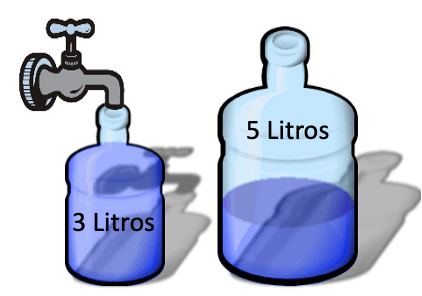




In [ ]:
class Node:
    'A node in a search problem'
    def __init__(self, state, parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        'The required sequence of states to get this node'
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        'The required sequence of actions to get this node'
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]

    def __eq__(self, node):
        if isinstance(node, Node):
            return self.state == node.state
        return False

    def __repr__(self):
        return str(self.state)


class JarrasProblem:
    def __init__(self, initial=(0, 0), goal=(0, 4)):
        self.initial = Node(initial, action=None)
        self.goal = goal

    def actions(self, node):
        x, y = node.state
        possible_actions = []
        if x < 3:
            possible_actions.append('L3')
        if y < 5:
            possible_actions.append('L5')
        if x > 0:
            possible_actions.append('V3')
        if y > 0:
            possible_actions.append('V5')
        if x > 0 and y < 5:
            possible_actions.append('T35')
        if x < 3 and y > 0:
            possible_actions.append('T53')
        return possible_actions

    def result(self, node, action):
        x, y = node.state
        print(node.state)
        if action == 'L3':
            return Node((3, y), parent=node, action=action)
        elif action == 'L5':
            return Node((x, 5), parent=node, action=action)
        elif action == 'V3':
            return Node((0, y), parent=node, action=action)
        elif action == 'V5':
            return Node((x, 0), parent=node, action=action)
        elif action == 'T35':
            amount = min(x, 5-y)
            print('amount T35: ',amount)
            return Node((x-amount, y+amount), parent=node, action=action)
        elif action == 'T53':
            amount = min(y, 3-x)
            print('amount T53: ',amount)
            return Node((x+amount, y-amount), parent=node, action=action)

    def is_goal(self, node):
        return node.state == self.goal

    def cost(self, node, action, next_node):
        return 1


In [ ]:
problem = JarrasProblem()
BFS(problem)
DFS(problem)


##  Canibales y misioneros__

Tres misioneros y tres caníbales deben cruzar un río usando un bote que puede llevar una o dos personas. Sin embargo, para cruzar el rio se deben tener en cuenta dos restricciones: primero, si hay misioneros presentes en un lado, no pueden ser superados en número por los caníbales (¡si esto ocurriera, los caníbales se comerían a los misioneros!). Segundo, el barco no puede cruzar el río vacio. Su objetivo es modelar esta situación como un problema de búsqueda y resolverlo usando BFS y DFS. Para esto:

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar los estados
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos

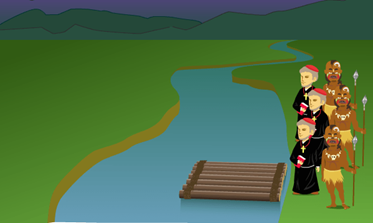


In [ ]:
class Node:
    'A node in a search problem'
    def __init__(self, state, parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        'The required sequence of states to get this node'
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        'The required sequence of actions to get this node'
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]

    def __eq__(self, node):
        if isinstance(node, Node):
            return self.state == node.state
        return False

    def __repr__(self):
        return str((self.state))

class MisionerosCanibalesProblem:
    def __init__(self, initial=(3, 3, 1), goal=(0, 0, 0)):
        self.initial = Node(initial, action=None)
        self.goal = goal

    def actions(self, node):
        actions = []
        m_left, c_left, b_left = node.state
        m_right, c_right, b_right = 3 - m_left, 3 - c_left, 1 - b_left

        if b_left == 1:
            if m_left >= 2:
                actions.append(('MM', (m_left - 2, c_left, b_right)))
            if c_left >= 2:
                actions.append(('CC', (m_left, c_left - 2, b_right)))
            if m_left >= 1 and c_left >= 1:
                actions.append(('MC', (m_left - 1, c_left - 1, b_right)))
            if m_left >= 1:
                actions.append(('M', (m_left - 1, c_left, b_right)))
            if c_left >= 1:
                actions.append(('C', (m_left, c_left - 1, b_right)))
        else:
            if m_right >= 2:
                actions.append(('MM', (m_left + 2, c_left, b_right)))
            if c_right >= 2:
                actions.append(('CC', (m_left, c_left + 2, b_right)))
            if m_right >= 1 and c_right >= 1:
                actions.append(('MC', (m_left + 1, c_left + 1, b_right)))
            if m_right >= 1:
                actions.append(('M', (m_left + 1, c_left, b_right)))
            if c_right >= 1:
                actions.append(('C', (m_left, c_left + 1, b_right)))

        return actions

    def result(self, node, action):
        state = action[1]
        return Node(state, parent=node, action=action[0])

    def is_goal(self, node):
        return node.state == self.goal

    def cost(self, node, action, next_node):
        return 1




In [ ]:
problem = MisionerosCanibalesProblem()
BFS(problem)
DFS(problem)


## Busqueda Informada__

Implemente un escenario de nodos con costos en donde los costos de los nodos pueden variar aleatoriamente.

Escoja un nodo de inicio y un nodo final e implemente el algoritmo de A(Star) y el algoritmo de dijkstra para encontrar el camino más optimo.

Realice una comparación del comportamiento de los algoritmos. Utilice una grafica que apoye loss resultados

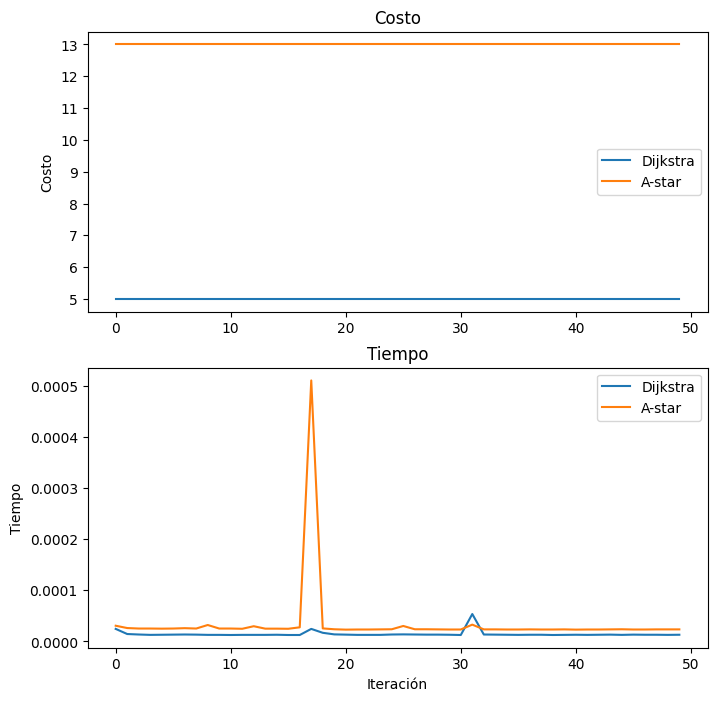

Dijkstra cost: 5.0, time: 1.3113021850585938e-05
A-star cost: 13.0, time: 2.3603439331054688e-05


In [ ]:

# Implementar el algoritmo de Dijkstra
import heapq
import networkx as nx
import random
import string
import time
import matplotlib.pyplot as plt
import numpy as np

# Definir el grafo de prueba
"""graph = {
    'A': {'B': 5, 'C': 1},
    'B': {'A': 5, 'D': 2},
    'C': {'A': 1, 'D': 6},
    'D': {'B': 2, 'C': 6, 'E': 3},
    'E': {'C': 6, 'D':2},
    'F': {'A':7,'E':2},
    'G':{'E':4,'F':1}
}"""

n = 20
graph = {}

for i in range(n):
    node = string.ascii_uppercase[i]
    neighbors = {}
    for j in range(random.randint(1, n-1)):
        neighbor = string.ascii_uppercase[random.randint(0, n-1)]
        if neighbor != node:
            cost = random.randint(1, 10)
            neighbors[neighbor] = cost
    graph[node] = neighbors


def dijkstra(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    visited = {}
    while frontier:
        cost, current_node = heapq.heappop(frontier)
        if current_node == goal:
            return cost
        if current_node in visited:
            continue
        visited[current_node] = True
        for neighbor, neighbor_cost in graph[current_node].items():
            if neighbor not in visited:
                heapq.heappush(frontier, (cost + neighbor_cost, neighbor))

# Implementar el algoritmo de A-star
def heuristic(a, b):
    return abs(ord(a) - ord(b))

def a_star(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    visited = {}
    while frontier:
        cost, current_node = heapq.heappop(frontier)
        if current_node == goal:
            return cost
        if current_node in visited:
            continue
        visited[current_node] = True
        for neighbor, neighbor_cost in graph[current_node].items():
            if neighbor not in visited:
                heapq.heappush(frontier, (cost + neighbor_cost + heuristic(neighbor, goal), neighbor))

# Ejecutar los algoritmos y comparar los tiempos

dijkstra_cost_list = []
dijkstra_time_list = []
a_star_cost_list = []
a_star_time_list = []

for x in range(0,50):

    start_node = 'A'
    goal_node = 'G'

    start_time = time.time()
    dijkstra_cost = dijkstra(graph, start_node, goal_node)
    dijkstra_time = time.time() - start_time

    start_time = time.time()
    a_star_cost = a_star(graph, start_node, goal_node)
    a_star_time = time.time() - start_time

    dijkstra_cost_list.append(dijkstra_cost)
    dijkstra_time_list.append(dijkstra_time)
    a_star_cost_list.append(a_star_cost)
    a_star_time_list.append(a_star_time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.plot(dijkstra_cost_list, label='Dijkstra')
ax2.plot(dijkstra_time_list, label='Dijkstra')

ax1.plot(a_star_cost_list, label='A-star')
ax2.plot(a_star_time_list, label='A-star')

ax1.set_title('Costo')
ax2.set_title('Tiempo')
ax1.set_ylabel('Costo')
ax2.set_ylabel('Tiempo')
ax2.set_xlabel('Iteración')
ax1.legend()
ax2.legend()

# Mostrar la gráfica resultante
plt.show()
dijkstra_mean_cost = np.array(dijkstra_cost)
dijkstra_mean_time = np.array(dijkstra_time)
a_star_mean_cost = np.array(a_star_cost)
a_star_mean_time = np.array(a_star_time)

dijkstra_mean_cost = dijkstra_mean_cost.mean()
dijkstra_mean_time = dijkstra_mean_time.mean()
a_star_mean_cost = a_star_mean_cost.mean()
a_star_mean_time = a_star_mean_time.mean()


print('Dijkstra cost: {}, time: {}'.format(dijkstra_mean_cost, dijkstra_mean_time))
print('A-star cost: {}, time: {}'.format(a_star_mean_cost, a_star_mean_time))



Como se puede ver en la gráfica de costo hay una diferencia bastante significativa en cuanto a los dos algoritmos dando como resultado un costo más alto para a estrella teniendo una diferencia de 8 con respecto a Dijkstra, con un grafo de tamaño 20 con costos aleatorios en donde se resuelve el mismo grafo 50 veces para poder evaluar el comportamiento en tiempo y costo de ambos algoritmos con un grafo dado. Por otra parte, en el gráfico de tiempo podemos ver que en promedio el tiempo de a estrella es mucho menor que Dijkstra lo que nos podría decir en un principio que es más rápido. Sin embargo, en la gráfica se puede observar un pico bastante grande en a estrella aproximadamente en la iteración número 15 y un pico por parte de Dijkstra aproximadamente en la iteración número 32 pero mucho menor que el pico de a estrella.

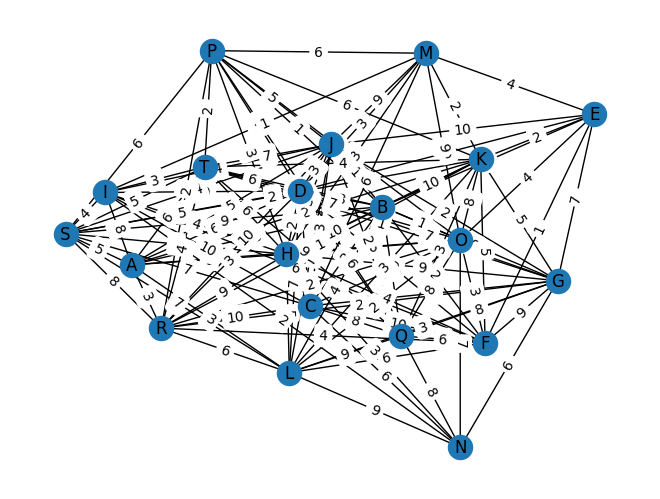

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for node in graph:
    G.add_node(node)
# Agregar aristas al grafo
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)
# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

